In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("car.xlsx")

In [3]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


C:\Users\win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnualSalary', ylabel='Density'>

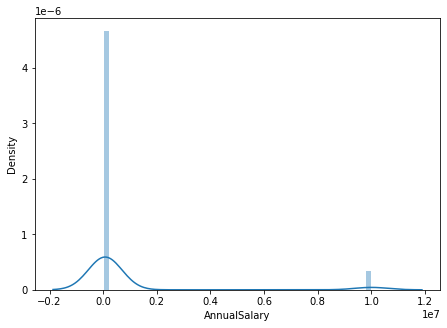

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['AnnualSalary'])

In [6]:
print("mean value of annual" , df['AnnualSalary'].mean())
print("std value of annual" , df['AnnualSalary'].std())
print("min value of annual" , df['AnnualSalary'].min())

mean value of annual 747758.5
std value of annual 2500629.143744057
min value of annual 15000


In [8]:
# Finding the boundary values
print("Highest allowed",df['AnnualSalary'].mean() + 3*df['AnnualSalary'].std())
print("Lowest allowed",df['AnnualSalary'].mean() - 3*df['AnnualSalary'].std())

Highest allowed 8249645.931232171
Lowest allowed -6754128.931232171


In [9]:
new_df = df[(df['AnnualSalary'] < 8249645 ) & (df['AnnualSalary'] > -6754128)]
new_df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [10]:
# calculating Z score

df['AnnualSalary_zscore'] = (df['AnnualSalary'] - df['AnnualSalary'].mean())/df['AnnualSalary'].std()

In [11]:
df

,User ID,Gender,Age,AnnualSalary,Purchased,AnnualSalary_zscore
0,385,Male,35,20000,0,-0.291030
1,681,Male,40,43500,0,-0.281633
2,353,Male,49,74000,0,-0.269436
3,895,Male,40,107500,1,-0.256039
4,661,Male,25,79000,0,-0.267436
...,...,...,...,...,...,...
995,863,Male,38,59000,0,-0.275434
996,800,Female,47,23500,0,-0.289631
997,407,Female,28,138500,1,-0.243642
998,299,Female,48,134000,1,-0.245442


In [12]:
upper_limit = df['AnnualSalary'].mean() + 3*df['AnnualSalary'].std()
lower_limit = df['AnnualSalary'].mean() - 3*df['AnnualSalary'].std()

In [13]:
upper_limit

8249645.931232171

In [14]:
df['AnnualSalary'] = np.where(
    df['AnnualSalary']>upper_limit,
    upper_limit,
    np.where(
        df['AnnualSalary']<lower_limit,
        lower_limit,
        df['AnnualSalary']
    )
)